In [1]:
!pip install pandas

/bin/bash: /home/andras/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [2]:
!pip install matplotlib

/bin/bash: /home/andras/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import inspect

In [15]:
column_names = ['ID','Name','CPU_Percentage','Memory_Usage','Memory_Percentage','Net_IO','Block_IO']

# Read all files and concatenate them into a single DataFrame
df_1 = pd.read_csv('../results/CURRENT/stats/bfs.log', names=column_names, header=0)
df_2 = pd.read_csv('../results/CURRENT/stats/dfs.log', names=column_names, header=0)

FileNotFoundError: [Errno 2] No such file or directory: 'bfs.log'

In [5]:
def conv(s):
    # Extract all numbers (including decimals) as strings along with their units
    number_strings_with_units = re.findall(r'(\d+(?:\.\d+)?)([GMKk]?i?B)', s)

    numbers = []
    for num_str, unit in number_strings_with_units:
        num = float(num_str)
        if unit in ['GiB', 'GB']:
            num *= 10**6
        elif unit in ['MiB', 'MB']:
            num *= 10**3
        # elif unit in ['KiB', 'kB', 'KB']:
        #     num *= 10**(-3)
        numbers.append(num)

    return numbers

In [6]:
def format_df(df):
    # Remove "%" sign from columns with percentages
    df = df.drop('ID', axis=1)
    df['Name'] = df['Name'].apply(str.strip)
    df['CPU_Percentage'] = df['CPU_Percentage'].str.replace('%', '').astype(float)
    df['Memory_Percentage'] = df['Memory_Percentage'].str.replace('%', '').astype(float)
    df['Memory_Usage'] = df['Memory_Usage'].apply(conv)
    df['Net_IO'] = df['Net_IO'].apply(conv)
    df['Block_IO'] = df['Block_IO'].apply(conv)
    df[['Memory_in_use', 'Available_memory']] = pd.DataFrame(df['Memory_Usage'].tolist(), index=df.index)
    df[['Net_IO_in', 'Net_IO_out']] = pd.DataFrame(df['Net_IO'].tolist(), index=df.index)
    df[['Block_IO_in', 'Block_IO_out']] = pd.DataFrame(df['Block_IO'].tolist(), index=df.index)
    return df

In [7]:
df.head()

,Name,CPU_Percentage,Memory_Usage,Memory_Percentage,Net_IO,Block_IO,Memory_in_use,Available_memory,Net_IO_in,Net_IO_out,Block_IO_in,Block_IO_out
0,hopeful_keller,99.40,"[313600.0, 31280000.0]",0.98,"[214.0, 0.0]","[0.0, 5280.0]",313600.0,31280000.0,214.0,0.0,0.0,5280.0
1,hopeful_keller,100.54,"[313600.0, 31280000.0]",0.98,"[215.0, 0.0]","[0.0, 5280.0]",313600.0,31280000.0,215.0,0.0,0.0,5280.0
2,hopeful_keller,99.76,"[313600.0, 31280000.0]",0.98,"[215.0, 0.0]","[0.0, 5280.0]",313600.0,31280000.0,215.0,0.0,0.0,5280.0
3,hopeful_keller,99.93,"[313600.0, 31280000.0]",0.98,"[215.0, 0.0]","[0.0, 5280.0]",313600.0,31280000.0,215.0,0.0,0.0,5280.0
4,hopeful_keller,100.17,"[321200.0, 31280000.0]",1.00,"[215.0, 0.0]","[0.0, 5280.0]",321200.0,31280000.0,215.0,0.0,0.0,5280.0


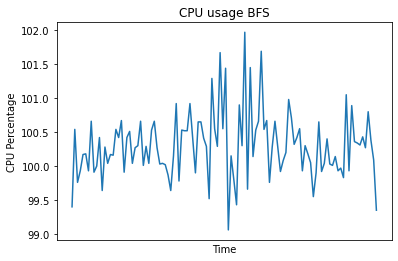

In [8]:
def do_cpu(name1, df_1, name2, df_2):
    plt.figure(figsize=(10, 6))

    # Plot series from df_1
    plt.plot(df_1['CPU_Percentage'], label=name1)

    # Plot series from df_2
    plt.plot(df_2['CPU_Percentage'], label=name2)

    plt.title('CPU usage comparison')
    plt.xlabel('Time')
    plt.ylabel('CPU Percentage')
    plt.gca().set_xticks([])
    plt.legend()

    plt.savefig('{}_{}_comparison.png'.format(name1, name2), dpi=300)

# Call the function
do_cpu('BFS', df_1, 'DFS', df_2)

/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


<Figure size 432x288 with 0 Axes>

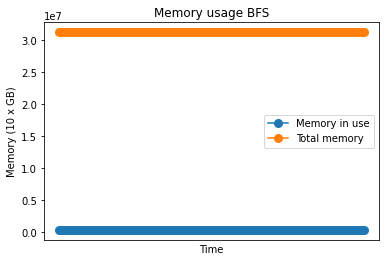

In [9]:

def do_mem(name, df):
    plt.figure()
    ax = df.plot( y=['Memory_in_use', 'Available_memory'], style='o-', marker='o', markersize=8)
    ax.set_ylabel('Memory (10 x GB)')
    ax.set_title('Memory usage {}'.format(name))

    plt.legend(['Memory in use', 'Total memory'])
    plt.xlabel('Time')
    plt.gca().set_xticks([])

    plt.savefig('{}_{}.png'.format(name, inspect.currentframe().f_code.co_name), dpi=300)

do_mem('BFS', df)

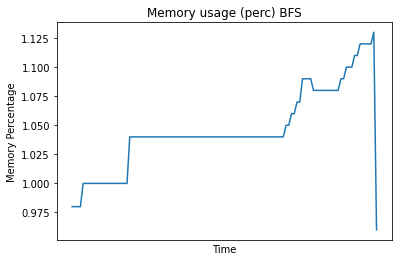

In [11]:
def do_mem_perc(name, df):
    plt.figure()
    plt.title('Memory usage (perc) {}'.format(name))
    plt.plot(df['Memory_Percentage'])
    plt.xlabel('Time')
    plt.ylabel('Memory Percentage')
    plt.gca().set_xticks([])
    plt.savefig('{}_{}.png'.format(name, inspect.currentframe().f_code.co_name), dpi=300)

do_mem_perc('BFS', df)

/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


<Figure size 432x288 with 0 Axes>

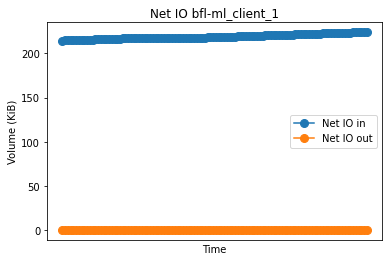

In [12]:
def do_io(name, df):
    plt.figure()


    ax = df.plot( y=['Net_IO_in', 'Net_IO_out'], style='o-', marker='o', markersize=8)
    ax.set_ylabel('Volume (KiB)')
    ax.set_title('Net IO {}'.format(name))

    plt.legend(['Net IO in', 'Net IO out'])
    plt.xlabel('Time')
    plt.gca().set_xticks([])

    plt.savefig('{}_{}.png'.format(name, inspect.currentframe().f_code.co_name), dpi=300)

do_io('BFS', df)

/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/andras/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


<Figure size 432x288 with 0 Axes>

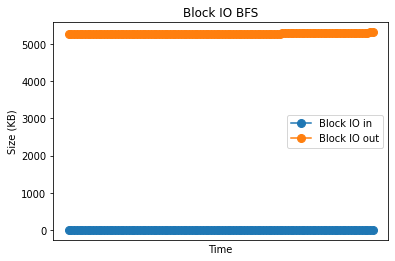

In [13]:
def do_block_io(name, df):
    plt.figure()

    ax = df.plot( y=['Block_IO_in', 'Block_IO_out'], style='o-', marker='o', markersize=8)
    ax.set_ylabel('Size (KB)')
    ax.set_title('Block IO {}'.format(name))

    plt.legend(['Block IO in', 'Block IO out'])
    plt.xlabel('Time')
    plt.gca().set_xticks([])

    plt.savefig('{}_{}.png'.format(name, inspect.currentframe().f_code.co_name), dpi=300)

do_block_io('BFS', df)

In [ ]:
names = df['Name'].unique()
names.sort()

In [ ]:
names

In [ ]:

for name in names:
    do_cpu(name, df)
    do_mem(name, df)
    do_mem_perc(name, df)
    do_io(name, df)
    do_block_io(name, df)